In [5]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

In [6]:
data = pd.read_csv('C:/Users/PC/Desktop/data/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

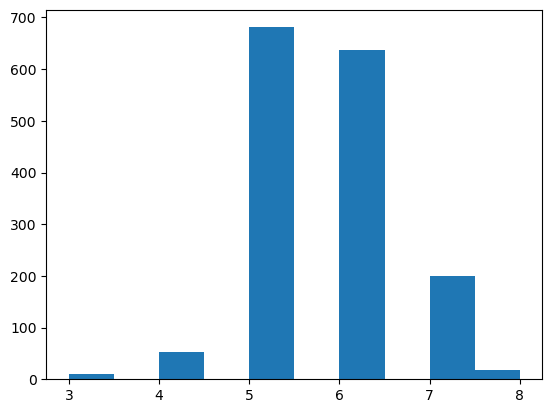

In [17]:
plt.hist(data.quality)

Text(0.5, 1.0, 'Identificacion de datos faltantes y  atipicos')

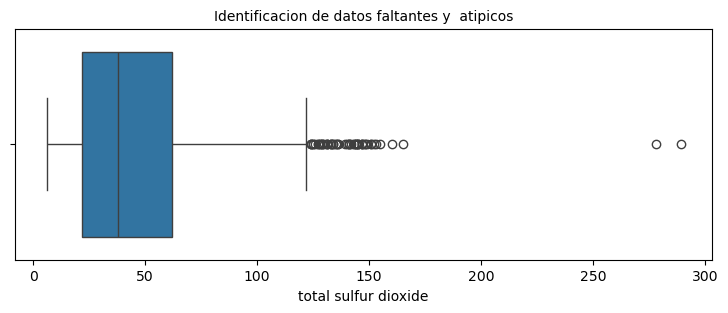

In [19]:
#total sulfur dioxide
plt.figure(figsize=(9,3))
sns.boxplot(x=data['total sulfur dioxide'])
plt.title('Identificacion de datos faltantes y  atipicos', fontsize =10)

In [21]:
nivel_maximo_tsd=150
total_atipicos=((data['total sulfur dioxide']>nivel_maximo_tsd)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 9


In [23]:
data=data[(data['total sulfur dioxide']<nivel_maximo_tsd)]

In [25]:
total_atipicos=((data['total sulfur dioxide']>nivel_maximo_tsd)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


Text(0.5, 1.0, 'Identificacion de datos faltantes y  atipicos')

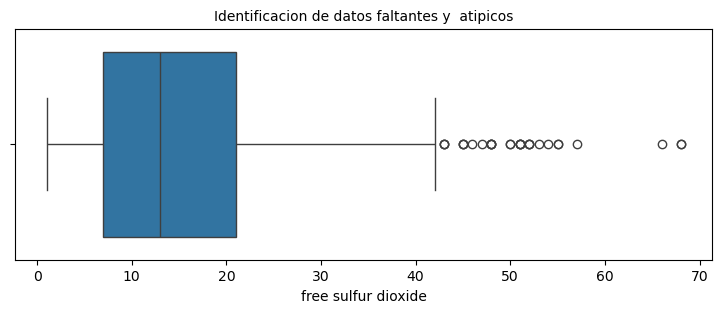

In [27]:
#total sulfur dioxide
plt.figure(figsize=(9,3))
sns.boxplot(x=data['free sulfur dioxide'])
plt.title('Identificacion de datos faltantes y  atipicos', fontsize =10) 

In [29]:
nivel_maximo_fsd=60
total_atipicos=((data['free sulfur dioxide']>nivel_maximo_fsd)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 3


In [31]:
data=data[(data['free sulfur dioxide']<nivel_maximo_fsd)]

In [33]:
total_atipicos=((data['free sulfur dioxide']>nivel_maximo_fsd)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1587 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1587 non-null   float64
 1   volatile acidity      1587 non-null   float64
 2   citric acid           1587 non-null   float64
 3   residual sugar        1587 non-null   float64
 4   chlorides             1587 non-null   float64
 5   free sulfur dioxide   1587 non-null   float64
 6   total sulfur dioxide  1587 non-null   float64
 7   density               1587 non-null   float64
 8   pH                    1587 non-null   float64
 9   sulphates             1587 non-null   float64
 10  alcohol               1587 non-null   float64
 11  quality               1587 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.2 KB


In [43]:
# porcentaje de datos para  entrenamiento (train) = 75%, y para prueba (test) = 25%

#se crean variables  X e Y para almacenar la informacion del entrenamiento

X = data.drop('quality',axis=1) # se  cargan los datos de train sin los datos de la columna diabetico
Y = data['quality'] # se cargan los datos de train con los datos d ela columna diabetico

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 13)

In [47]:
print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1241            9.8             0.370         0.39             2.5      0.079   
17              8.1             0.560         0.28             1.7      0.368   
689             8.1             0.380         0.48             1.8      0.157   
477            10.4             0.240         0.49             1.8      0.075   
1435           10.2             0.540         0.37            15.4      0.214   
...             ...               ...          ...             ...        ...   
750             8.3             0.650         0.10             2.9      0.089   
1564            7.2             0.695         0.13             2.0      0.076   
74              9.7             0.320         0.54             2.5      0.094   
177             7.5             0.520         0.42             2.3      0.087   
339            12.5             0.280         0.54             2.3      0.082   

      free sulfur dioxide  

In [49]:
print(y_train)

1241    5
17      5
689     5
477     6
1435    6
       ..
750     5
1564    5
74      5
177     6
339     7
Name: quality, Length: 1269, dtype: int64


In [51]:
corr = X.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.265824,0.676245,0.134720,0.095931,-0.147304,-0.113737,0.673744,-0.686915,0.182589,-0.061037
volatile acidity,-0.265824,1.000000,-0.559311,0.008221,0.057281,-0.021929,0.074807,0.007294,0.237133,-0.264486,-0.196125
citric acid,0.676245,-0.559311,1.000000,0.144940,0.207573,-0.066444,0.013776,0.377133,-0.538704,0.315157,0.107034
residual sugar,0.134720,0.008221,0.144940,1.000000,0.053786,0.128034,0.148330,0.371137,-0.084715,0.013786,0.041380
chlorides,0.095931,0.057281,0.207573,0.053786,1.000000,-0.006286,0.050769,0.196878,-0.269039,0.373487,-0.218169
free sulfur dioxide,-0.147304,-0.021929,-0.066444,0.128034,-0.006286,1.000000,0.660851,-0.032314,0.076071,0.064896,-0.069620
total sulfur dioxide,-0.113737,0.074807,0.013776,0.148330,0.050769,0.660851,1.000000,0.083688,-0.051020,0.057628,-0.231136
density,0.673744,0.007294,0.377133,0.371137,0.196878,-0.032314,0.083688,1.000000,-0.353768,0.146025,-0.493941
pH,-0.686915,0.237133,-0.538704,-0.084715,-0.269039,0.076071,-0.051020,-0.353768,1.000000,-0.200383,0.210788
sulphates,0.182589,-0.264486,0.315157,0.013786,0.373487,0.064896,0.057628,0.146025,-0.200383,1.000000,0.096792


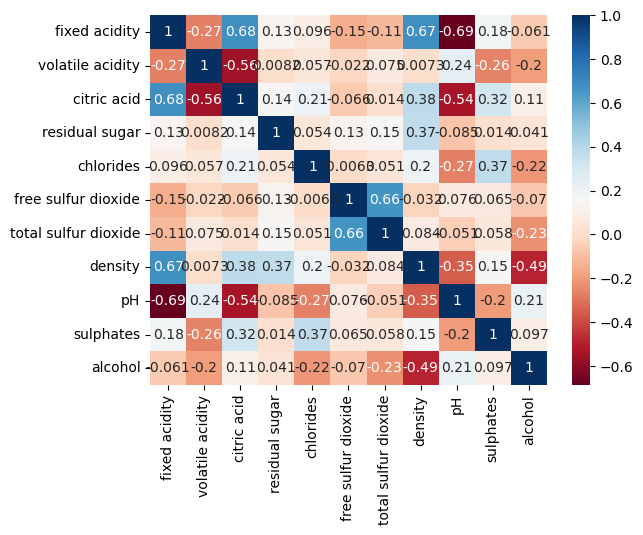

In [53]:
sns.heatmap(X.corr(), annot=True, cmap="RdBu")
plt.show()


In [193]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 13)

In [55]:
tree= DecisionTreeClassifier()

In [57]:
arbol = tree.fit(x_train,y_train)

[Text(0.5307488393376648, 0.9722222222222222, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1269\nvalue = [9.0, 46.0, 519.0, 513.0, 167.0, 15.0]'),
 Text(0.29423623569627616, 0.9166666666666666, 'x[9] <= 0.575\ngini = 0.555\nsamples = 770\nvalue = [6, 28, 437, 267, 30, 2]'),
 Text(0.41249253751697046, 0.9444444444444444, 'True  '),
 Text(0.11156904577191622, 0.8611111111111112, 'x[10] <= 10.05\ngini = 0.45\nsamples = 297\nvalue = [3.0, 19.0, 211.0, 60.0, 4.0, 0.0]'),
 Text(0.047032583397982934, 0.8055555555555556, 'x[10] <= 9.05\ngini = 0.402\nsamples = 250\nvalue = [2, 16, 188, 42, 2, 0]'),
 Text(0.012412723041117145, 0.75, 'x[3] <= 2.05\ngini = 0.7\nsamples = 10\nvalue = [1, 2, 3, 4, 0, 0]'),
 Text(0.0062063615205585725, 0.6944444444444444, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0, 0, 0]'),
 Text(0.0031031807602792862, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.009309542280837859, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nv

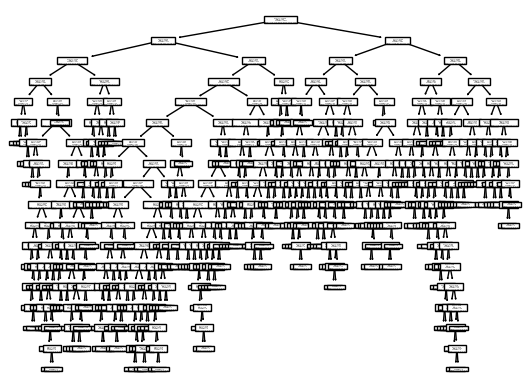

In [59]:
plot_tree(arbol)

In [60]:
predicciones = arbol.predict(x_test)

In [61]:
predicciones

array([6, 7, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 5, 5, 5, 4, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 6, 5,
       5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6,
       7, 6, 6, 6, 4, 5, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 3, 5,
       4, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       5, 4, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 8, 5, 7, 5, 7, 5, 5, 5, 5, 5, 7, 5,
       5, 7, 7, 7, 7, 6, 5, 5, 5, 6, 6, 5, 8, 5, 6, 6, 6, 5, 6, 6, 6, 8,
       5, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,

In [63]:
print(metrics.classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.14      0.17         7
           5       0.72      0.71      0.71       154
           6       0.58      0.59      0.59       123
           7       0.52      0.57      0.54        30
           8       0.67      0.67      0.67         3

    accuracy                           0.64       318
   macro avg       0.45      0.45      0.45       318
weighted avg       0.63      0.64      0.63       318



Del desempeño del modelo se puede describir:
* Presicion:Presicion mide la proporcion de predicicones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo.Aqui la  precicion para la clase "condicion" es de 0.45, lo que significa que el 45% de las predicciones esta acorde a la calidad del vino correspondiente.
* Recall: mide la proporcion de predicciones positivas verdaderas entre todas las instancias positivasreales en el conjunto de datos. Aqui en el recall para la clase quality es 0.45, lo que indica que el modelo identifico correctamente al 45% de todos vinos
* F1 score: es la media armonica de precision y recuperacion. Proporciona una puntuaicon unica que equilibra la precicion y Recall. Aqui la puntuacion F1 para la clase "diabetica" es 0.45 lo que indica un equilibrio entre precicion y recuerdo
De la matrix de confucion podemos interpretar:

Ya que la  muestra  carece de  algunas calidades de vino como 1 ,2 ,9 y 10 por lo que el modelo no tienen como identificar estas  calidades de vino 